In [363]:
import pygad
import numpy as np
import math

Map: <br>
------------------------------- <br>
$|\space 2 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 1 \space\space 1 \space\space 1 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 1 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 1 \space\space 1 \space\space 0 \space\space 1 \space\space 1 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 1 \space\space 1 \space\space 0 \space\space 1 \space\space 1 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 1 \space\space 1 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 1 \space\space 1 \space\space 0 \space |$ <br>
$|\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 0 \space\space 2 \space |$ <br>
------------------------------- <br>

In [364]:
#creating the map above
MAP = np.zeros( (10,10) )

In [365]:
MAP[0,0] = 2 #starting point
MAP[9,9] = 4 #ending point

MAP[0,7:10] = 1
MAP[7:9, 7:9] = 1
MAP[4:6, 0:2] = 1
MAP[3,4] = 1
MAP[4:6, 3:5] = 1
MAP

array([[2., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4.]])

Creating algorithm to detect if an obstacle is intersected.

In [404]:
def determine_angle(start: (int,int), end: (int,int)):
    dy = end[1] - start[1]
    dx = end[0] - start[0]
    angle = math.atan2(dy,dx) * 180 / math.pi
    return angle

def distance(start: (int,int), end: (int,int)):
    dy = abs(end[0] - start[0])
    dx = abs(end[1] - start[1])
    return (dy**2 + dx**2) ** (0.5)

def obstacle_threshold(start: (int,int), obstacle: (int,int)): # (x,y) returns (low, high)
    vec_x = abs(obstacle[0] - start[0])
    vec_y = abs(obstacle[1] - start[1])
    
    tl = (vec_x-0.5, vec_y+0.5)
    tr = (vec_x+0.5, vec_y+0.5)
    bl = (vec_x-0.5, vec_y-0.5)
    br = (vec_x+0.5, vec_y-0.5)
    
    ls_angle = np.array([math.atan2(i[1], i[0]) * 180 / math.pi for i in [tl,tr,bl,br]])
    
    min_ls_angle = min(ls_angle)
    max_ls_angle = max(ls_angle)
    return (min_ls_angle, max_ls_angle)

def sign(x):
    if x==0 or x/abs(x) == 1:
        return 1
    else:
        return -1

def obstacle_obstructed(start: (int,int), end: (int,int), obstacle: (int,int)):
    traj_vector = np.array([end[0] - start[0], end[1] - start[1]])
    obj_vector = np.array([obstacle[0] - start[0], obstacle[1] - start[1]])
    
    obj_2_traj = traj_vector - obj_vector
    
    dot = np.dot(np.array(obj_vector), np.array(obj_2_traj))
    
    if dot <= 0: #if it is at or in front of obstacle, then is gud
        return False
    
    sig_x = sign(obj_vector[0])
    sig_y = sign(obj_vector[1])
    traj_vector[0] *= sig_x
    traj_vector[1] *= sig_y
    
    obj_vector[0] *= sig_x
    obj_vector[1] *= sig_y
    
    angle_traj = determine_angle(start,end)
    threshold = obstacle_threshold(start, obstacle)
    
    return threshold[0] <= angle_traj <= threshold[1]
    

In [405]:
np.where(MAP==1)
obstacles_idx = np.where(MAP==1)
obstacles_idx = list(zip(obstacles_idx[0], obstacles_idx[1]))
print(obstacles_idx)

[(0, 7), (0, 8), (0, 9), (3, 4), (4, 0), (4, 1), (4, 3), (4, 4), (5, 0), (5, 1), (5, 3), (5, 4), (7, 7), (7, 8), (8, 7), (8, 8)]


In [449]:
# complete solution: start pt1 pt2 end
# solution: pt1y pt1x pt2y pt2x
def fitness_func(solution, solution_idx):
    penalty = 0
    
    solution = list(map(int, solution))
    start = (0,0)
    pt1 = tuple(solution[0:2][::-1])
    pt2 = tuple(solution[2:4][::-1])
    end = (9,9)
    
    if MAP[pt1[::-1] ] > 0:
        penalty += 999999
    if MAP[pt2[::-1] ] > 0:
        penalty += 999999
        
    obstacles_idx = np.where(MAP==1)
    obstacles_idx = list(zip(obstacles_idx[1], obstacles_idx[0]))
    
    for i in obstacles_idx:
        if obstacle_obstructed(start, pt1, i):
            penalty += 999999
        if obstacle_obstructed(pt1, pt2, i):
            penalty += 999999
        if obstacle_obstructed(pt2, end, i):
            penalty += 999999
    
    
    dis = distance(start,pt1) + distance(pt1,pt2) + distance(pt2,end)
    return 1.0 / (dis + penalty)

In [470]:
#hyperparameters
num_generations = 200
num_parents_mating = 4


sol_per_pop = 50
num_genes = 4 #y1x1 y2x2

init_range_low = 0
init_range_high = 8

mutation_percent_genes = 10

In [471]:
ga_instance = pygad.GA(num_generations = num_generations,
                      num_parents_mating=num_parents_mating,
                      fitness_func=fitness_func,
                      sol_per_pop=sol_per_pop,
                      num_genes=num_genes,
                      init_range_low=init_range_low,
                      init_range_high=init_range_high,
                      mutation_percent_genes=mutation_percent_genes)

In [472]:
ga_instance.run()

Parameters of the best solution : [1.06715595 3.94337233 2.58463506 7.68029888]
Fitness value of the best solution = 9.99986434690845e-07
Index of the best solution : 0





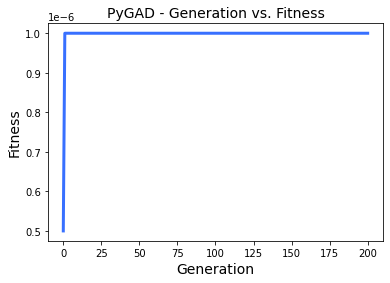

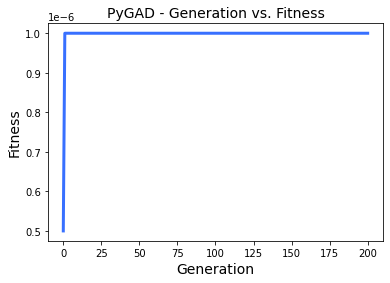

In [473]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
print('\n\n')
ga_instance.plot_result()

In [474]:
#getting the distance from the best solution
solution = list(map(int, solution))
start = (0,0)
pt1 = tuple(solution[0:2])
pt2 = tuple(solution[2:4])
end = (9,9)

dis = distance(start,pt1) + distance(pt1,pt2) + distance(pt2,end)
dis

14.565493175066557

In [475]:
start_end_dis = distance(start,end)
start_end_dis

12.727922061357855

In [476]:
SOLUTION_MAP = np.zeros( (10,10) )
SOLUTION_MAP[0,0] = 2
SOLUTION_MAP[9,9] = 4

SOLUTION_MAP[0,7:10] = 1
SOLUTION_MAP[7:9, 7:9] = 1
SOLUTION_MAP[4:6, 0:2] = 1
SOLUTION_MAP[3,4] = 1
SOLUTION_MAP[4:6, 3:5] = 1

SOLUTION_MAP[pt1] = 5
SOLUTION_MAP[pt2] = 5

In [477]:
SOLUTION_MAP

array([[2., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4.]])